In [1]:
import sys
sys.path.append("/Users/david/Documents/code/fhmm/v1")

In [41]:
import src.ads_davidjames9610.ads as ads
import src.ads_davidjames9610.useful as useful
import numpy as np
import os
import os.path
from pathlib import Path
import matplotlib.pyplot as plt
from importlib import reload
from src.classifiers_davidjames9610.test_a.config import config_location
import importlib
config = importlib.import_module(config_location)
reload(config)
import src.misc_davidjames9610.fe_methods as fe
import src.misc_davidjames9610.proc_methods as pm
from hmmlearn.hmm import GaussianHMM, GMMHMM, BaseHMM
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time


In [3]:
# config additions
# type, classification, viterbi, annotations, plt cms, save cms, (different places for Viterbi vs Class
# show annotations, smoothing,
# ?

In [25]:
import pickle
import d_classifiers_to_results
reload(d_classifiers_to_results)

sls = pickle.load(open(config.samples_labels,'rb'))
features = pickle.load(open(config.features,'rb'))
classifiers = pickle.load(open(config.classifiers,'rb'))
d_classifiers_to_results.include_buffer_in_features(features)

  buffering for: lp


In [5]:
CLASSIFICATION = 'classification'

eval_type = CLASSIFICATION

Directory '/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/ivector_speech_data/results/classification/normal' created.
For classifier: GaussianHMM
  Testing for: lp


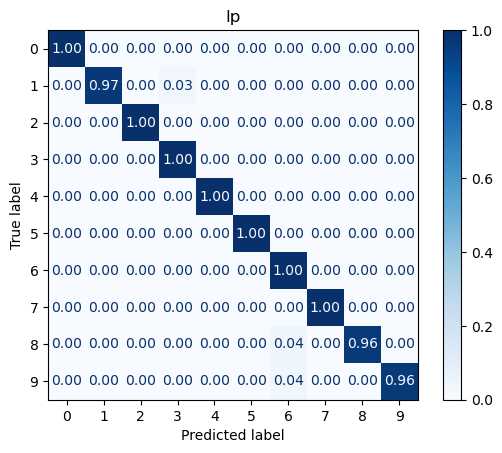

Execution time: 7.383795 seconds
Directory '/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/ivector_speech_data/results/classification/buffer' already exists.
For classifier: GaussianHMM
  Testing for: lp


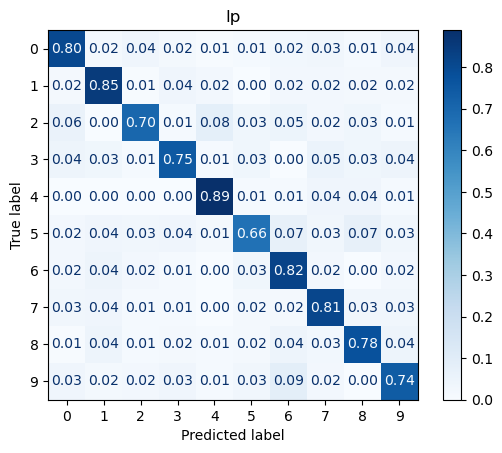

Execution time: 12.900665 seconds


In [44]:
import d_classifiers_to_results
reload(d_classifiers_to_results)

start_time = time.time()

classification_results = d_classifiers_to_results.get_classification_results(
    features, classifiers, sls, config.basedir, plot_cm=True, save_plots=False)

end_time = time.time()
print(f"Execution time: {end_time - start_time:.6f} seconds")

start_time = time.time()

classification_buffer_results = d_classifiers_to_results.get_classification_buff_results(
    features, classifiers, sls, config.basedir, plot_cm=True, save_plots=False)
end_time = time.time()

print(f"Execution time: {end_time - start_time:.6f} seconds")

Directory '/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/ivector_speech_data/results/classification-valg/normal' created.
For classifier: GaussianHMM
testing for feature type:  lp


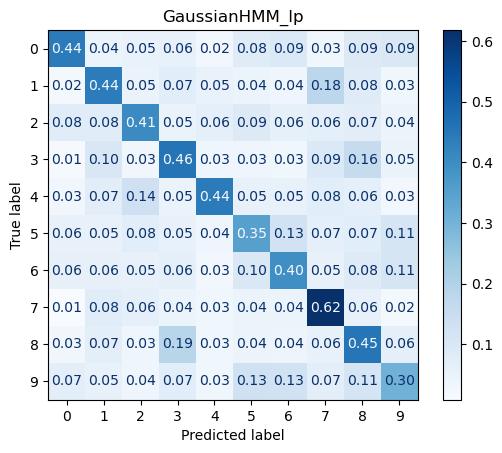

use cm
Execution time: 15.106588 seconds


In [45]:
import d_classifiers_to_results
reload(d_classifiers_to_results)

start_time = time.time()

classification_results_valg = d_classifiers_to_results.get_classification_valg_results(
    features, classifiers, sls, config.basedir, plot_cm=True, save_plots=True)
end_time = time.time()
print(f"Execution time: {end_time - start_time:.6f} seconds")


Directory '/Users/david/Documents/code/fhmm/v1/src/classifiers_davidjames9610/test_a/ivector_speech_data/results/classification-valg/buffer/' already exists.
For classifier: GaussianHMM
testing for feature type:  lp


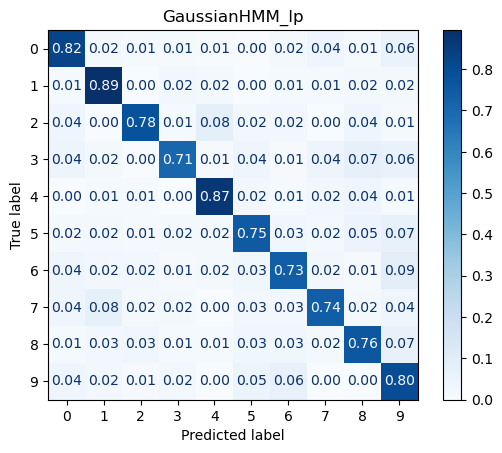

Execution time: 80.393876 seconds


In [46]:
start_time = time.time()

classification_results_valg_buffer = d_classifiers_to_results.get_classification_valg_buffer_results(
    features, classifiers, sls, config.basedir, plot_cm=True, save_plots=True)

end_time = time.time()

print(f"Execution time: {end_time - start_time:.6f} seconds")
# 84 seconds

TypeError: get_classification_buff_results() got an unexpected keyword argument 'buffer_length'

In [20]:
# combined hmm approach, still Viterbi, this assumes I have longish real input data,
import src.misc_davidjames9610.decode_combine as dc
reload(dc)

# decode_combine_results = d_classifiers_to_results.decode_combine_results()
# todo look like less accuracy when using viterbi over a long output ?
# include annotation for spectrogram

results = {}  # one for each process method
count = 0

# CLASSIFICATION
for feature_key in features:

    print('testing for feature type: ', feature_key)
    cv_index = 0    # todo think about updating this cv index for testing
    curr_features = features[feature_key]['val_features'][cv_index]
    curr_labels = features[feature_key]['val_label'][cv_index]
    curr_classifiers = classifiers[feature_key]
    long_labels = [curr_labels[i] * np.ones(len(curr_features[i])) for i in range(len(curr_labels))]
    labels_true = np.concatenate(long_labels)

    combined_model = dc.DecodeCombineGaussian([curr_classifiers[hmm_key] for hmm_key in curr_classifiers])

    _, labels_predicted, val_log_prob = combined_model.decode_hmmlearn(np.concatenate(curr_features))

    # CM
    cm = confusion_matrix(labels_true, labels_predicted, labels=list(sls['num_to_label'].keys()),
                      normalize='true')
    # if plot_cm:
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(sls['num_to_label'].keys()))
    disp.plot(cmap=plt.cm.Blues, values_format='.2f')
    plt.title(feature_key)
    # plt.savefig(output_dir + feature_key + '.png')
    plt.show()

    print('use cm')

    break


testing for feature type:  lp


TypeError: list indices must be integers or slices, not str